In [1]:
from math_so.model import lotka_volterra
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Numerical Differentiation

Using a Taylor expansion of the (sufficiently often differentiable) function $f$ about $x$,

1. $f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \ldots, $
2. $f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) + \ldots, $
3. $f(x+2h) = f(x) + 2h f'(x) + 4\frac{h^2}{2!} f''(x) + 8\frac{h^3}{3!} f'''(x) + \ldots, $
4. $f(x-2h) = f(x) - 2h f'(x) + 4\frac{h^2}{2!} f''(x) - 8\frac{h^3}{3!} f'''(x) + \ldots, $

we can derive the following finite difference approximations to the derivative of $f$ at $x$.

## First-order finite difference 
From (1) we obtain:
$$\begin{align*}f'_\text{forward}(x) &=\displaystyle \frac{f(x+h) - f(x)}{h} 
\color{red}{-\frac{h}{2!}f''(x)-\frac{h^2}{3!}f'''(x)+\dots}\\
                      &=\displaystyle \frac{f(x+h) - f(x)}{h}  \color{red}{+\mathcal{O}(h)}
\end{align*}$$

From (2) we obtain:
$$\begin{align*}f'_\text{backward}(x) &=\displaystyle \frac{f(x) - f(x-h)}{h} 
\color{red}{+\frac{h}{2!}f''(x)-\frac{h^2}{3!}f'''(x)+\dots}\\
                      &=\displaystyle \frac{f(x) - f(x-h)}{h}  \color{red}{+\mathcal{O}(h)}
\end{align*}$$

From (1) and (2) we obtain:
$$\begin{align*}f'_\text{central}(x) &=\displaystyle \frac{f(x+h) - f(x-h)}{2h} 
\color{red}{-\frac{h^2}{3!}f'''(x)+\dots}\\
                      &=\displaystyle \frac{f(x+h) - f(x-h)}{2h}  \color{red}{+\mathcal{O}(h^2)}
\end{align*}$$

The error for the forward and backward difference method os of order $h$, for the central methos the error is of order $h^2$. (From the highest oder term in the dropped part of the taylor series. [[1](https://www.youtube.com/watch?v=ZJkGI5DZQv8&list=PLYdroRCLMg5OvLx1EtY1ByvveJeTEXQd_&index=18)][[2](https://www.youtube.com/watch?v=C2Wk-wiXLvE&list=PLYdroRCLMg5OvLx1EtY1ByvveJeTEXQd_&index=20)])

Here's an example of a function whose derivatives we know analytically:

In [2]:
f = lambda x: np.log(x)
x0 = 3
df_ex = 1/x0      #f'(x0)
d2f_ex = -1/x0**2 #f''(x0) 

In [3]:
def fd_forward1(f, x, h):
    """fd_forward1 calculates the derivative of f at x 
    with First-order forward finite difference.
    """
    return (f(x + h) - f(x))/h
def fd_backward1(f, x, h):
    """fd_backward1 calculates the derivative of f at x 
    with First-order backward finite difference.
    """
    return (f(x)-f(x - h))/h
def fd_central1(f, x, h):
    """fd_central1 calculates the derivative of f at x 
    with First-order central finite difference.
    """
    return (f(x + h) - f(x-h))/(2*h)

**Forward/Backward**: Let's check if the error really decreases by a factor of 2 as we halve $h$, until ultimately roundoff errors spoil the convergence:

In [4]:
h = .1
for m in np.arange(0,24):
    df = fd_forward1(f, x0, h)
    err = np.abs(df - df_ex)
    if m > 0:
        print('h = {:.2E}, err = {:.2E}, fac = {:.2f}'.format(h, err, err_old/err))
    err_old = err
    h = h/2

h = 5.00E-02, err = 2.75E-03, fac = 1.98
h = 2.50E-02, err = 1.38E-03, fac = 1.99
h = 1.25E-02, err = 6.93E-04, fac = 1.99
h = 6.25E-03, err = 3.47E-04, fac = 2.00
h = 3.13E-03, err = 1.73E-04, fac = 2.00
h = 1.56E-03, err = 8.68E-05, fac = 2.00
h = 7.81E-04, err = 4.34E-05, fac = 2.00
h = 3.91E-04, err = 2.17E-05, fac = 2.00
h = 1.95E-04, err = 1.09E-05, fac = 2.00
h = 9.77E-05, err = 5.43E-06, fac = 2.00
h = 4.88E-05, err = 2.71E-06, fac = 2.00
h = 2.44E-05, err = 1.36E-06, fac = 2.00
h = 1.22E-05, err = 6.78E-07, fac = 2.00
h = 6.10E-06, err = 3.39E-07, fac = 2.00
h = 3.05E-06, err = 1.70E-07, fac = 2.00
h = 1.53E-06, err = 8.48E-08, fac = 2.00
h = 7.63E-07, err = 4.26E-08, fac = 1.99
h = 3.81E-07, err = 2.16E-08, fac = 1.97
h = 1.91E-07, err = 1.06E-08, fac = 2.05
h = 9.54E-08, err = 5.90E-09, fac = 1.79
h = 4.77E-08, err = 5.90E-09, fac = 1.00
h = 2.38E-08, err = 1.06E-08, fac = 0.56
h = 1.19E-08, err = 1.24E-09, fac = 8.50


In [5]:
h = .1
for m in np.arange(0,24):
    df = fd_backward1(f, x0, h)
    err = np.abs(df - df_ex)
    if m > 0:
        print('h = {:.2E}, err = {:.2E}, fac = {:.2f}'.format(h, err, err_old/err))
    err_old = err
    h = h/2

h = 5.00E-02, err = 2.81E-03, fac = 2.02
h = 2.50E-02, err = 1.40E-03, fac = 2.01
h = 1.25E-02, err = 6.96E-04, fac = 2.01
h = 6.25E-03, err = 3.48E-04, fac = 2.00
h = 3.13E-03, err = 1.74E-04, fac = 2.00
h = 1.56E-03, err = 8.68E-05, fac = 2.00
h = 7.81E-04, err = 4.34E-05, fac = 2.00
h = 3.91E-04, err = 2.17E-05, fac = 2.00
h = 1.95E-04, err = 1.09E-05, fac = 2.00
h = 9.77E-05, err = 5.43E-06, fac = 2.00
h = 4.88E-05, err = 2.71E-06, fac = 2.00
h = 2.44E-05, err = 1.36E-06, fac = 2.00
h = 1.22E-05, err = 6.78E-07, fac = 2.00
h = 6.10E-06, err = 3.39E-07, fac = 2.00
h = 3.05E-06, err = 1.70E-07, fac = 2.00
h = 1.53E-06, err = 8.49E-08, fac = 2.00
h = 7.63E-07, err = 4.24E-08, fac = 2.00
h = 3.81E-07, err = 2.15E-08, fac = 1.98
h = 1.91E-07, err = 1.16E-08, fac = 1.86
h = 9.54E-08, err = 5.74E-09, fac = 2.01
h = 4.77E-08, err = 3.41E-09, fac = 1.68
h = 2.38E-08, err = 8.07E-09, fac = 0.42
h = 1.19E-08, err = 1.74E-08, fac = 0.46


**Central**: Let's check if the error really decreases by a factor of 4 as we halve $h$, until ultimately roundoff errors spoil the convergence:

In [6]:
h = .1
for m in np.arange(0,24):
    df = fd_central1(f, x0, h)
    err = np.abs(df - df_ex)
    if m > 0:
        print('h = {:.2E}, err = {:.2E}, fac = {:.2f}'.format(h, err, err_old/err))
    err_old = err
    h = h/2

h = 5.00E-02, err = 3.09E-05, fac = 4.00
h = 2.50E-02, err = 7.72E-06, fac = 4.00
h = 1.25E-02, err = 1.93E-06, fac = 4.00
h = 6.25E-03, err = 4.82E-07, fac = 4.00
h = 3.13E-03, err = 1.21E-07, fac = 4.00
h = 1.56E-03, err = 3.01E-08, fac = 4.00
h = 7.81E-04, err = 7.54E-09, fac = 4.00
h = 3.91E-04, err = 1.88E-09, fac = 4.00
h = 1.95E-04, err = 4.70E-10, fac = 4.00
h = 9.77E-05, err = 1.17E-10, fac = 4.03
h = 4.88E-05, err = 2.93E-11, fac = 3.99
h = 2.44E-05, err = 8.79E-12, fac = 3.33
h = 1.22E-05, err = 4.85E-12, fac = 1.81
h = 6.10E-06, err = 4.85E-12, fac = 1.00
h = 3.05E-06, err = 3.15E-11, fac = 0.15
h = 1.53E-06, err = 6.79E-11, fac = 0.46
h = 7.63E-07, err = 7.76E-11, fac = 0.88
h = 3.81E-07, err = 7.76E-11, fac = 1.00
h = 1.91E-07, err = 5.04E-10, fac = 0.15
h = 9.54E-08, err = 7.76E-11, fac = 6.50
h = 4.77E-08, err = 1.24E-09, fac = 0.06
h = 2.38E-08, err = 1.24E-09, fac = 1.00
h = 1.19E-08, err = 8.07E-09, fac = 0.15


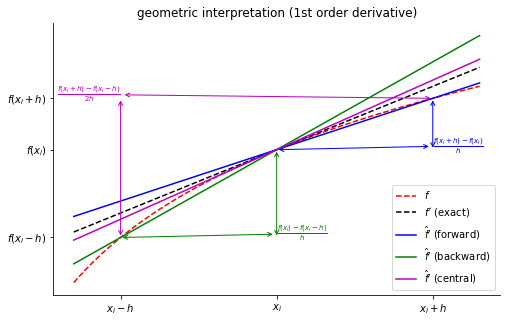

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
f = lambda x: np.log(x)
x0 = 0.2
df = lambda x: 1/x
h = .1
a,b = x0-h,x0+h

x = np.linspace(a-.03,b+.03,200)
y = f(x) 
y0 = f(x0)
yt = df(x0) * (x - x0) + y0 
ytf = fd_forward1(f, x0, h) * (x - x0) + y0 
ytb = fd_backward1(f, x0, h) * (x - x0) + y0 
ytc = fd_central1(f, x0, h) * (x - x0) + y0 

ax.plot(x,y,'r--',label=r'$f$')
ax.plot(x,yt,'k--',label=r"$f'$ (exact)")
ax.plot(x,ytf,'b-',label=r"$\hat{f}'$ (forward)")
ax.plot(x,ytb,'g-',label=r"$\hat{f}'$ (backward)")
ax.plot(x,ytc,'m-',label=r"$\hat{f}'$ (central)")

ax.annotate(r'$\frac{f(x_i+h) - f(x_i)}{h}$', xy=(x0, y0), xytext=(x0+h, y0), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'b'},color='b')
ax.annotate('', xy=(x0+h, f(x0+h)), xytext=(x0+h, y0), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'b'},color='b')

ax.annotate(r'$\frac{f(x_i)-f(x_i-h)}{h}$', xy=(x0-h, f(x0-h)), xytext=(x0, f(x0-h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'g'},color='g')
ax.annotate('', xy=(x0, y0), xytext=(x0, f(x0-h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'g'},color='g')

ax.annotate(r'$\frac{f(x_i+h)-f(x_i-h)}{2h}$', xy=(x0+h, f(x0+h)), xytext=(x0-h, f(x0+h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'m'},color='m',horizontalalignment='right')
ax.annotate('', xy=(x0-h, f(x0-h)), xytext=(x0-h, f(x0+h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'m'},color='m')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([x0-h, x0, x0+h], [r'$x_i-h$', r'$x_i$', r'$x_i+h$'])
plt.yticks([f(x0-h), f(x0), f(x0+h)], [r'$f(x_i-h)$', r'$f(x_i)$', r'$f(x_i+h)$'])
plt.title('geometric interpretation (1st order derivative)')
plt.legend(loc='lower right')
plt.show()    

## Second-order finite difference 
From (1)+(2) we obtain:
$$\begin{align*}f''_\text{central}(x) &=\displaystyle \frac{f(x+h) - 2f(x)+f(x-h)}{h^2} 
\color{red}{+\frac{h^2}{12}f^{(4)}(x)+\dots}\\
                      &=\displaystyle \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}  \color{red}{+\mathcal{O}(h^2)}
\end{align*}$$

Ref: Chapra, Canale: Numerical Methods for Engineers

Here's an example of a function whose derivatives we know analytically:

In [8]:
f = lambda x: np.log(x)
x0 = 3
df_ex = 1/x0      #f'(x0)
d2f_ex = -1/x0**2 #f''(x0) 

In [9]:
def f2d_central2(f, x, h):
    """fd_central2 calculates the derivative of f at x 
    with Second-order central finite difference.
    """
    return (f(x + h) - 2*f(x) + f(x-h))/(h**2)

**Central**: Let's check if the error really decreases by a factor of 4 as we halve $h$, until ultimately roundoff errors spoil the convergence:

In [10]:
h = .1
for m in np.arange(0,10):
    d2f = f2d_central2(f, x0, h)
    err = np.abs(d2f - d2f_ex)
    if m > 0:
        print('h = {:.2E}, err = {:.2E}, fac = {:.2f}'.format(h, err, err_old/err))
    err_old = err
    h = h/2

h = 5.00E-02, err = 1.54E-05, fac = 4.00
h = 2.50E-02, err = 3.86E-06, fac = 4.00
h = 1.25E-02, err = 9.65E-07, fac = 4.00
h = 6.25E-03, err = 2.41E-07, fac = 4.00
h = 3.13E-03, err = 6.03E-08, fac = 4.00
h = 1.56E-03, err = 1.52E-08, fac = 3.98
h = 7.81E-04, err = 3.78E-09, fac = 4.01
h = 3.91E-04, err = 1.24E-09, fac = 3.06
h = 1.95E-04, err = 2.69E-09, fac = 0.46


# Numerical solution of ordinary differential equations

An ordinary differential equation (ODE)  is an equation of the form

$$\frac{dx}{dt}=f(y,t)$$

for an unknown function $y:\mathbf{R}\to \mathbf{R}^d$, $t\mapsto y(t)$, and a right-hand side $f:\mathbf{R} \times \mathbf{R}^d \to \mathbf{R}^d$. The initial value problem is completed by specifying an initial condition

$$y(t_0)=y_0$$

Under certain conditions on $f$, a unique solution exists at least in a neighbourhood of $t_0$.

A simple example is the growth of a bacteria colony, whose growth rate is proportional to the size of the population:

$$\frac{dy}{dt}=rt, y(0)=y_0$$

with a constant $r\in\mathbf{R}$, The exact solution is $y(t) = y_0 \, e^{rt}$.

In [11]:
r=0.8
f=lambda t,y:r*y
y0=1000
a=0; b=2
t_ex = np.linspace(a-.03,b+.03,200)
y_ex = lambda t: y0*np.exp(r*t)

The simplest numerical method is **Euler's method**, which is based on the Taylor expansion at first order:

$$y(t+h) = y(t) + h y'(t)+ O(h^2) = y(t) + h \, f(t,h) + O(h^2),$$

where for the second equality we have used the ODE to replace the derivative. This step is repeated $n$ times, with $h=(b-a)/n$, starting at $t=a$ and ending up at $t=b$. An implementation can be found in `euler`.

In [12]:
def euler(f,a,b,y0,n):
    """
    EULER solves the ordinary differential equation with right-hand side f and
    initial value y(a) = y0 on the interval [a, b] with n steps of Euler's method
    """
    h = (b - a)/n
    t,y = a,y0
    t_,y_=[],[]
    while t <= b:
        t_.append(t)
        y_.append(y)
        t += h
        y += h * f(t,y)
    return(np.array(t_),np.array(y_))

In [13]:
n = 20
[t_euler, y_euler] = euler(f, a, b, y0, n)

From the above equation, the local truncation error of a single Euler step is of the order $O(h^2)$. However after the step is repeated $n=(b-a)/h$ times, the global truncation error at $t=b$ is only $O(h)$. So when the number of subintervals is doubled, the error decreases by a factor of 2.

In [14]:
n = 20
for m in np.arange(0,10):
    tm, ym = euler(f, a, b, y0, n)
    err = abs(ym[n-1] - y_ex(b))
    if m > 0:
        print('n = {:}, err = {:.2f}, fac = {:.2f}'.format(n, err, err_old/err))
    err_old = err
    n = n*2

n = 40, err = 336.67, fac = 1.89
n = 80, err = 173.19, fac = 1.94
n = 160, err = 87.86, fac = 1.97
n = 320, err = 44.25, fac = 1.99
n = 640, err = 22.21, fac = 1.99
n = 1280, err = 11.12, fac = 2.00
n = 2560, err = 5.57, fac = 2.00
n = 5120, err = 2.78, fac = 2.00
n = 10240, err = 1.39, fac = 2.00


There are more accurate schemes, e.g. the popular 4th-order Runge-Kutta method `rk4`:

In [15]:
def rk4(f,a,b,y0,n):
    """
    RK4 solves the ordinary differential equation with right-hand side f and
    initial value y(a) = y0 on the interval [a, b] with n steps of 4th-order 
    Runge-Kutta method
    """
    dy=lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6
            )( dt * f( t + dt  , y + dy3   ) )
            )( dt * f( t + dt/2, y + dy2/2 ) )
            )( dt * f( t + dt/2, y + dy1/2 ) )
            )( dt * f( t       , y         ) )
    h = (b - a)/n
    t,y = a,y0
    t_,y_=[],[]
    while t <= b:
        t_.append(t)
        y_.append(y)
        t += h
        y += dy(t,y,h)
    return(np.array(t_),np.array(y_))

n = 20
[t_rk4, y_rk4] = rk4(f, a, b, y0, n)

`scipy` provides `solve_ivp` as interface to various solvers for initial value problems of systems of ODEs. 
- Explicit Runge-Kutta methods ('RK23', 'RK45', 'DOP853') should be used for non-stiff problems
- Implicit methods ('Radau', 'BDF') for stiff problems
- Among Runge-Kutta methods, 'DOP853' is recommended for solving with high precision (low values of `rtol` and `atol`)

In [16]:
RK23  =solve_ivp(f,(a, b),[y0],method='RK23')
RK45  =solve_ivp(f,(a, b),[y0],method='RK45')
DOP853=solve_ivp(f,(a, b),[y0],method='DOP853')
Radau =solve_ivp(f,(a, b),[y0],method='Radau')
BDF   =solve_ivp(f,(a, b),[y0],method='BDF')

Observe how the step size is adaptive (non-uniform) in this case.

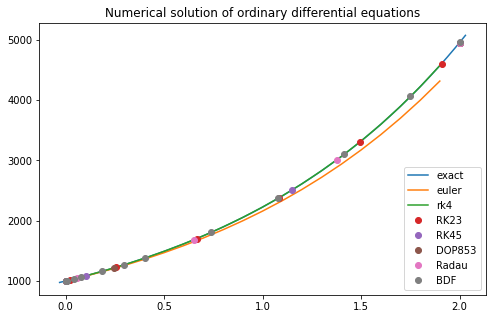

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_ex   ,y_ex(t_ex) , label=r'exact')
ax.plot(t_euler, y_euler, label=r'euler');
ax.plot(t_rk4  , y_rk4  , label=r'rk4');
ax.plot(RK23.t,   RK23.y[0,:],   'o', label=r'RK23');
ax.plot(RK45.t,   RK45.y[0,:],   'o', label=r'RK45');
ax.plot(DOP853.t, DOP853.y[0,:], 'o', label=r'DOP853');
ax.plot(Radau.t,  Radau.y[0,:],  'o', label=r'Radau');
ax.plot(BDF.t,    BDF.y[0,:],    'o', label=r'BDF');
plt.title('Numerical solution of ordinary differential equations')
plt.legend(loc='lower right')
plt.show()

In [18]:
t_rk4

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

## Systems of ODEs, additional parameters

So far we have taken the dimension to be $d=1$. An example of a system with $d=2$ unknown functions is the [Lotka-Volterra (predator-prey) model](https://en.wikipedia.org/wiki/Lotka–Volterra_equations):

$$
\begin{align}
\frac{dy_1}{dt} &= \alpha y_1 - \beta y_1 y_2,\\  
\frac{dy_2}{dt} &= \gamma y_1 y_2 - \delta y_2  
\end{align}
$$

Here $y_1$ is the population of prey, $y_2$ the population of predators, and $\alpha,\beta,\gamma,\delta>0$ are constants. Each has a certain birthrate and a deathrate. The birthrate of the prey is proportional to its current population and the birthrate of the predator is proportional to both its population and the prey population. The deathrate of the prey is proportional to both its population and the predator population and the deathrate of the predator is proportional to its population.

The equations are non-linear since they include $xy$, this implies that finding an analytical solution will be much harder but for the numerical integration the problem isn't any more difficult.

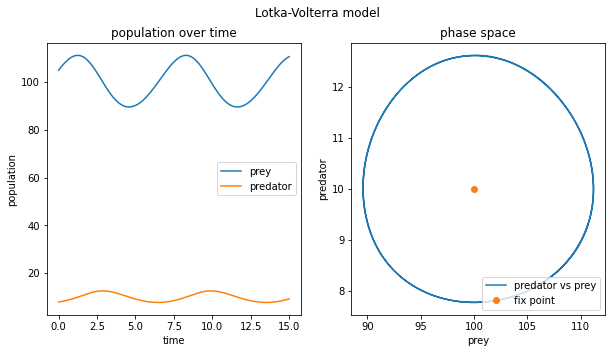

In [19]:
f = lambda t, y: [p*y[0] - q*y[0]*y[1], r*y[0]*y[1] - s*y[1]]
p = 0.4; q = 0.04; r = 0.02; s = 2
a = 0; b = 15
y0 = [105, 8]
lotka_volterra.main(p, q, r, s, y0[0], y0[1], [a, b])

The Population dynamics is shown in the left plot. The population of predators trailing that of prey by 90° in the cycle.

The right plot shows the solutions parametrically as orbits in phase space, without representing time, but with one axis representing the number of prey and the other axis representing the number of predators for all times. 

**Population equilibrium** occurs in the model when neither of the population levels is changing, i.e. when both of the derivatives are equal to 0:

$$
\begin{align}
0 &= \alpha y_1 - \beta y_1 y_2,\\  
0 &= \gamma y_1 y_2 - \delta y_2  
\end{align}
$$

The above system of equations yields two solutions:
$$y_1=0,y_2=0$$
$$y_1=\frac{\delta}{\gamma},y_2=\frac{\alpha}{\beta}$$

The first solution effectively represents the extinction of both species. If both populations are at 0, then they will continue to be so indefinitely. The second solution represents a **fixed point** at which both populations sustain their current, non-zero numbers, and, in the simplified model, do so indefinitely.

y_1 = 100.0
y_2 = 10.0


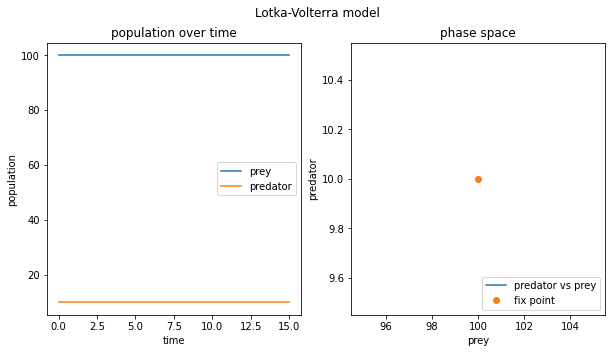

In [20]:
print(r'y_1 = {}'.format(s/r))
print(r'y_2 = {}'.format(p/q))
lotka_volterra.main(p, q, r, s, s/r, p/q, [a, b])

The **stability of the fixed point** at the origin can be determined by performing a [linearization](https://www.youtube.com/watch?v=k_IkbxwSK7g) using partial derivatives. The linearization of the  Lotka-Volterra system about an equilibrium point $(y_1^*, y_2^*)$ has the form

$$
\begin{bmatrix}
 \frac{du}{dt}\\
 \frac{dv}{dt}
\end{bmatrix}
= \mathbf{J}
\begin{bmatrix}
 u\\
 v
\end{bmatrix}
$$


where $u = y_1 − y_1^*$, $v = y_2 − y_2^*$ and $\mathbf{J}$ is the Jacobian ([Community matrix](https://en.wikipedia.org/wiki/Community_matrix)).

The [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix) of the predator–prey model is

$$\mathbf{J}(y_1,y_2)=
\begin{bmatrix}
\alpha - \beta y_2 & -\beta y_1\\
\gamma y_2         & \gamma y_1 - \delta
\end{bmatrix}
$$

The eigenvalues of the Jacobian determine the stability of the equilibrium point. By the [stable manifold theorem](https://en.wikipedia.org/wiki/Stable_manifold_theorem), if one or both eigenvalues of $\mathbf{J}$  have positive real part then the equilibrium is unstable, but if all eigenvalues have negative real part then it is stable.

For the **first fixed point** (extinction) of $(0, 0)$, the Jacobian matrix $\mathbf{J}$ becomes

$$\mathbf{J}(0,0)=
\begin{bmatrix}
\alpha & 0\\
0      & - \delta
\end{bmatrix}
$$

The eigenvalues of this matrix are

$$\lambda_1=\alpha,\lambda_2=-\gamma$$

In the model $\alpha$ and $\gamma$ are always greater than zero, and as such the sign of the eigenvalues above will always differ. Hence the fixed point at the origin is a saddle point.

The stability of this fixed point is of significance. If it were stable, non-zero populations might be attracted towards it, and as such the dynamics of the system might lead towards the extinction of both species for many cases of initial population levels. However, as the fixed point at the origin is a saddle point, and hence unstable, it follows that the extinction of both species is difficult in the model. (In fact, this could only occur if the prey were artificially completely eradicated, causing the predators to die of starvation. If the predators were eradicated, the prey population would grow without bound in this simple model.) The populations of prey and predator can get infinitesimally close to zero and still recover.

For the **second fixed point** of $\left(\frac{\delta}{\gamma},\frac{\alpha}{\beta}\right)$, the Jacobian matrix $\mathbf{J}$ becomes

$$\mathbf{J}\left(\frac{\delta}{\gamma},\frac{\alpha}{\beta}\right)=
\begin{bmatrix}
0 & -\frac{\beta\delta}{\gamma}\\
\frac{\alpha\gamma}{\beta} & 0
\end{bmatrix}
$$

The eigenvalues of this matrix are

$$\lambda_1=i\sqrt{\alpha\delta},\lambda_2=-i\sqrt{\alpha\delta}$$

As the eigenvalues are both purely imaginary and conjugate to each others, this fixed point is elliptic, so the solutions are periodic, oscillating on a small ellipse around the fixed point, with a frequency $\omega=\sqrt{\lambda_1\lambda_2}=\sqrt{\alpha\delta}$ and period $T=\frac{2\pi}{\sqrt{\lambda_1\lambda_2}}$.

As illustrated in the circulating oscillations in the figure above, the level curves are closed orbits surrounding the fixed point.

In [21]:
print('T = {}'.format(2*np.pi/np.sqrt(p*s)))

T = 7.024814731040727


Here the interactive version of this model:

In [22]:
lotka_volterra.interactive()

interactive(children=(FloatSlider(value=0.4, description='Birth Rate of Prey', layout=Layout(width='99%'), max…

**Note**: In real-life situations, prey fluctuations of the discrete numbers of individuals, as well as the family structure and life-cycle of prey, might cause the prey to actually go extinct, and, by consequence, the predators as well.

## Higher-order ODEs

Higher-order ODEs can be rewritten as systems of first-order ODEs. For example, the second-order initial value problem

$$\frac{d^2 y}{dt^2} = -k^2 y, \quad y(0) = y_0, \quad y'(0) = y_0'$$

is equivalent to the following first-order system obtained by introducing the auxiliary variables $y_1 := y$ and y_2 := y':

$$\frac{dy_1}{dt} = y_2, \quad \frac{dy_2}{dt} = -k^2 y_1, \quad y_1(0) = y_0, \quad y_2(0) = y_0'.$$

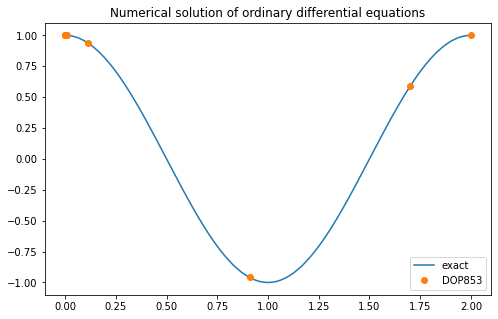

In [23]:
k = np.pi
f = lambda t, y: [y[1], -k**2*y[0]]
a = 0; b = 2
y0 = [1, 0]
DOP853 = solve_ivp(f, [a,b],y0, method='DOP853')
y_ex = lambda t: np.cos(k*t)
t_ex = np.linspace(a,b,200)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_ex   ,y_ex(t_ex) , label=r'exact')
ax.plot(DOP853.t, DOP853.y[0,:], 'o', label=r'DOP853');
plt.title('Numerical solution of ordinary differential equations')
plt.legend(loc='lower right')
plt.show()

# Simulation of random processes

Recall that `np.random.rand` generates uniformly distributed random numbers between 0 and 1, whereas `np.random.randn` generates normally distributed random numbers with $\mu=0$ and $\sigma=1$. 

Tossing a coin can be simulated by dividing the interval  into two equal parts:

In [24]:
r = np.random.rand()
if r > 0.5:
    print('head')
else:
    print('tail')

tail


A nice application of the Monte Carlo method is to estimate $\pi$. Take a square of side length 2 and inscribe a circle of radius 1. Generate uniformly distributed pairs (i.e. points in $\mathbf{R}^2$) of random numbers in $[0,2]^2$. Then the ratio of points falling into the circle to the total number of points should be the ratio of the areas of the circle and the square, namely $\pi/4$. We construct a logical vector to detect and count the points inside the circle.

In [25]:
n = 1000000
x = 2*np.random.rand(2, n)
incircle = (x[0,:] - 1)**2 + (x[1,:] - 1)**2 < 1
pi_estimated = 4*sum(incircle)/n
pi_estimated

3.139724